In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy.stats import skew

import warnings 
warnings.filterwarnings("ignore")

%matplotlib inline
pd.set_option("display.max_columns", None)

In [2]:
test_df = pd.read_excel(r'Data/Titanic_Survival_Test.xls', header = 0, index_col=0)
train_df = pd.read_excel(r'Data/Titanic_Survival_Train.xls', header = 0, index_col=0)
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

def create_piechart(data, column):
    """
    objective: Create piechart for categorical variables present in Pandas Dataframe
    
    Params:
        data: this is pandas dataframe
        column: this is column name which is used to create plot
        
    Return: 
        This will show piechart
    """
    labels = list(data[column].value_counts().to_dict().keys())
    sizes = list(data[column].value_counts().to_dict().values())
    
    plt.pie(sizes,
           labels = labels,
           autopct = '%1.2f%%',
           shadow = False,
           startangle = 45)
    plt.axis('equal')
    plt.title("Piechart - {}".format(column))
    plt.show()

In [4]:
print(train_df.shape)
print(test_df.shape)

(891, 11)
(21, 11)


## Step2: EDA

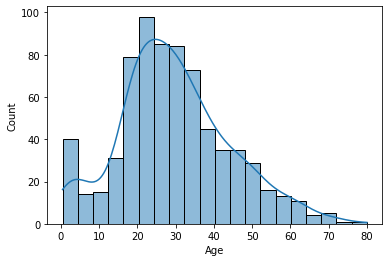

In [5]:
# Plot histogram
sns.histplot(data = train_df, x="Age", kde = True)
plt.show()

- Majority passengers blong to age group 20 to 40
- Chindren from 1 to 5 age is 40
- Less senior citizen

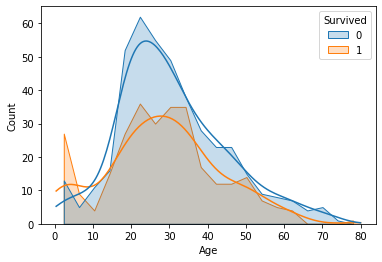

In [6]:
# Plot histogram
sns.histplot(data = train_df, 
             x ="Age", 
             kde = True,
             hue = "Survived",
             element = "poly")
plt.show()

- Age group 20 to 40 half population survided
- chindren 0 to 8 ages all survived

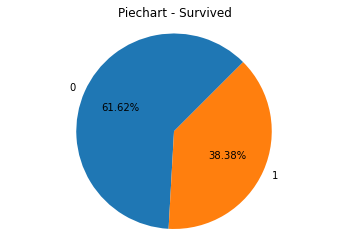

In [7]:
create_piechart(train_df, "Survived")

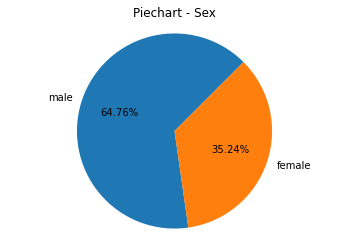

In [8]:
create_piechart(train_df, "Sex")

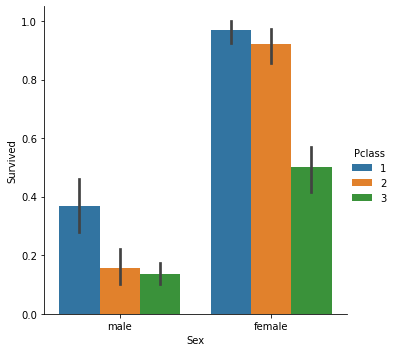

In [9]:
sns.catplot(data=train_df,
           x="Sex",
           y="Survived",
           hue = "Pclass",
           kind = "bar")
plt.show()

- Chanses of survival for class 1 female is 90 to 100%
- Chanses of survival for class 3 female is more than class 1 male
- Class 3 male has very the least less than 20% chance of survival

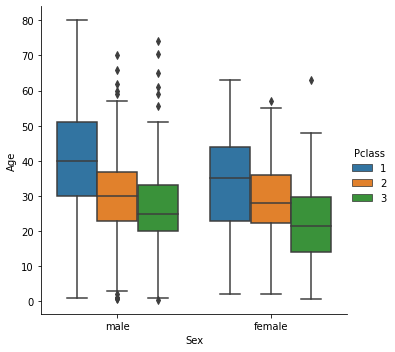

In [10]:
sns.catplot(data=train_df,
           x="Sex",
           y="Age",
           hue = "Pclass",
           kind = "box")
plt.show()

- Pclass 1 male passengers from age group 0 to 80 no outlierrs
- Pclass 3 male age group 0 to 50 has several old age people who suppose to be in Pclass 1 as per their age
- Pclass 3 Female has one outlier whos age is around 70 who do not belong in Pclass age group which is 0 to 50

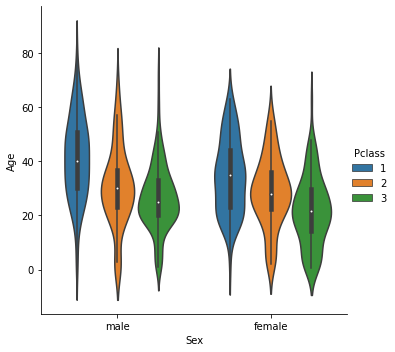

In [11]:
sns.catplot(data=train_df,
           x="Sex",
           y="Age",
           hue = "Pclass",
           kind = "violin")
plt.show()

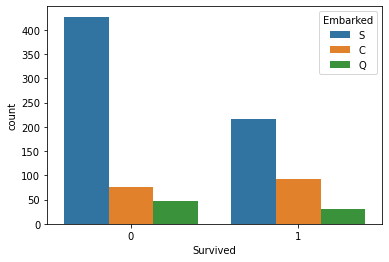

In [12]:
sns.countplot(x="Survived", hue="Embarked", data = train_df)
plt.show()

- S location has max deaths and other two locatons has very less deaths(Probably very less passengers embarked from location C & Q)

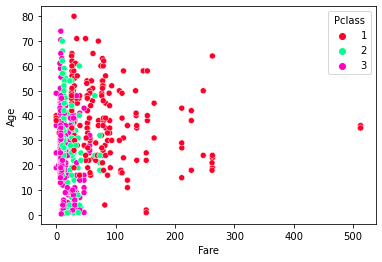

In [13]:
sns.scatterplot(data = train_df, x = "Fare", y ="Age", hue = "Pclass", palette = "gist_rainbow")
plt.show()

- Pclass 1 has paid max amount of fare and no of passengers are also more

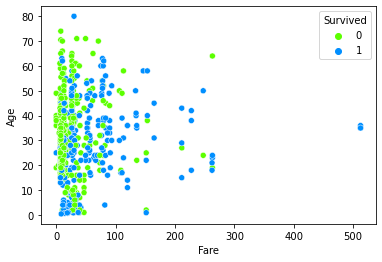

In [14]:
sns.scatterplot(data = train_df, x = "Fare", y ="Age", hue = "Survived", palette = "gist_rainbow")
plt.show()

- Chanses of survival increased with increase in fare amount

### Step 3: Data Preprocessing

In [15]:
train_df.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [16]:
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [17]:
# feature selection
train_df = train_df[['Name','Pclass','Sex','Age','Survived']]
test_df = test_df[['Name','Pclass','Sex','Age','Survived']]

In [18]:
# finding the missing values
print(train_df.isnull().sum())
print()
print(test_df.isnull().sum())

Name          0
Pclass        0
Sex           0
Age         177
Survived      0
dtype: int64

Name        0
Pclass      0
Sex         0
Age         2
Survived    0
dtype: int64


In [19]:
# Imputing numerical missing data with mean value
train_df["Age"].fillna(train_df["Age"].mean(), inplace = True)

# Imputing numerical missing data with mean value
test_df["Age"].fillna(test_df["Age"].mean(), inplace = True)



In [20]:
#finding the missing values
print(train_df.isnull().sum())
print()
print(test_df.isnull().sum())


Name        0
Pclass      0
Sex         0
Age         0
Survived    0
dtype: int64

Name        0
Pclass      0
Sex         0
Age         0
Survived    0
dtype: int64


## Data normalisation

In [21]:
train_df["Sex"]=train_df["Sex"].map({"male":0, "female":1})
test_df["Sex"]=test_df["Sex"].map({"male":0, "female":1})

In [22]:
train_df.tail()

,Name,Pclass,Sex,Age,Survived
PassengerId,,,,,
887,"Montvila, Rev. Juozas",2,0,27.000000,0
888,"Graham, Miss. Margaret Edith",1,1,19.000000,1
889,"Johnston, Miss. Catherine Helen ""Carrie""",3,1,29.699118,0
890,"Behr, Mr. Karl Howell",1,0,26.000000,1
891,"Dooley, Mr. Patrick",3,0,32.000000,0


In [23]:
test_df.tail()

,Name,Pclass,Sex,Age,Survived
PassengerId,,,,,
887,"Montvila, Rev. Juozas",2,0,27.000000,0
888,"Graham, Miss. Margaret Edith",1,1,19.000000,1
889,"Johnston, Miss. Catherine Helen ""Carrie""",3,1,29.842105,0
890,"Behr, Mr. Karl Howell",1,0,26.000000,1
891,"Dooley, Mr. Patrick",3,0,32.000000,0


- Test data is alreday a part of training data

In [24]:
X_train = train_df.values[:870, 1:-1] # variables from pclass to age[observation]
y_train=train_df.values[:870, -1] # passengers id 1 to 870
y_train = y_train.astype(int) # convert into integer

X_test = test_df.values[:, 1:-1]
y_test = test_df.values[:, -1]
y_test = y_test.astype(int)

In [25]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# mean = 0 and std = 1
scaler = StandardScaler()

scaler.fit(X_train)

X_train_scale = scaler.transform(X_train)
X_test_scale = scaler.transform(X_test)
# while working on seperate train test data, fit the scaler object only
# and use the same scaler object  to transfrom both the train as well as test


In [26]:
X_train_scale

array([[ 8.28102044e-01, -7.34726486e-01, -5.89320802e-01],
       [-1.56541549e+00,  1.36105070e+00,  6.35879178e-01],
       [ 8.28102044e-01,  1.36105070e+00, -2.83020807e-01],
       ...,
       [-1.56541549e+00, -7.34726486e-01,  9.98541867e-02],
       [ 8.28102044e-01, -7.34726486e-01,  2.39122131e-04],
       [ 8.28102044e-01, -7.34726486e-01, -1.96767078e+00]])

In [27]:
X_test_scale

array([[ 0.82810204, -0.73472649, -0.28302081],
       [-1.56541549,  1.3610507 ,  1.32505417],
       [-1.56541549, -0.73472649,  0.25300418],
       [ 0.82810204, -0.73472649,  1.32505417],
       [-0.36865672,  1.3610507 , -0.12987081],
       [ 0.82810204,  1.3610507 , -1.12534579],
       [ 0.82810204, -0.73472649, -0.7424708 ],
       [ 0.82810204, -0.73472649, -0.8190458 ],
       [ 0.82810204, -0.73472649,  0.0111884 ],
       [-1.56541549,  1.3610507 ,  2.01422916],
       [-0.36865672,  1.3610507 , -0.35959581],
       [ 0.82810204, -0.73472649,  0.25300418],
       [ 0.82810204,  1.3610507 , -0.5893208 ],
       [-0.36865672, -0.73472649, -0.12987081],
       [ 0.82810204, -0.73472649, -0.35959581],
       [ 0.82810204,  1.3610507 ,  0.71245418],
       [-0.36865672, -0.73472649, -0.20644581],
       [-1.56541549,  1.3610507 , -0.8190458 ],
       [ 0.82810204,  1.3610507 ,  0.0111884 ],
       [-1.56541549, -0.73472649, -0.28302081],
       [ 0.82810204, -0.73472649,  0.176

In [28]:
from sklearn.linear_model import LogisticRegression

In [29]:
%%time
#create a model
classifier = LogisticRegression()

#create a model
classifier.fit(X_train_scale, y_train)

# predict using the model
y_pred = classifier.predict(X_test_scale)

print(list(zip(y_test,y_pred)))

[(0, 0), (1, 1), (0, 0), (0, 0), (1, 1), (1, 1), (0, 0), (0, 0), (0, 0), (1, 1), (1, 1), (0, 0), (0, 1), (0, 0), (0, 0), (0, 0), (0, 0), (1, 1), (0, 1), (1, 1), (0, 0)]
CPU times: total: 15.6 ms
Wall time: 25.9 ms


In [30]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm =confusion_matrix(y_test,y_pred)

print(cfm)

print("Classification report: ")

print(classification_report(y_test,y_pred))

acc=accuracy_score(y_test, y_pred)
print("Accuracy of the model: ",acc)

[[12  2]
 [ 0  7]]
Classification report: 
              precision    recall  f1-score   support

           0       1.00      0.86      0.92        14
           1       0.78      1.00      0.88         7

    accuracy                           0.90        21
   macro avg       0.89      0.93      0.90        21
weighted avg       0.93      0.90      0.91        21

Accuracy of the model:  0.9047619047619048


In [31]:
y_pred_train = classifier.predict(X_train_scale)


cfm =confusion_matrix(y_train,y_pred_train)

print(cfm)

print("Classification report: ")

print(classification_report(y_train,y_pred_train))

acc=accuracy_score(y_train, y_pred_train)
print("Accuracy of the model: ",acc)

[[459  76]
 [100 235]]
Classification report: 
              precision    recall  f1-score   support

           0       0.82      0.86      0.84       535
           1       0.76      0.70      0.73       335

    accuracy                           0.80       870
   macro avg       0.79      0.78      0.78       870
weighted avg       0.80      0.80      0.80       870

Accuracy of the model:  0.7977011494252874


### Using Sklearn KNN

In [34]:
# Predicting using the Kneighbours_Classifier
from sklearn.neighbors import KNeighborsClassifier

In [51]:

model_KNN = KNeighborsClassifier(n_neighbors = 85)
# fit the model on the data and predict the values
model_KNN.fit(X_train_scale,y_train)


KNeighborsClassifier(n_neighbors=85)

### Test data evaluation

In [52]:
#Predict using model
y_pred = model_KNN.predict(X_test_scale)

cfm =confusion_matrix(y_test,y_pred)
print(cfm)

print("Classification report: ")

print(classification_report(y_test,y_pred))

acc=accuracy_score(y_test, y_pred)
print("Accuracy of the model: ",acc)

[[11  3]
 [ 1  6]]
Classification report: 
              precision    recall  f1-score   support

           0       0.92      0.79      0.85        14
           1       0.67      0.86      0.75         7

    accuracy                           0.81        21
   macro avg       0.79      0.82      0.80        21
weighted avg       0.83      0.81      0.81        21

Accuracy of the model:  0.8095238095238095


In [53]:
#Predict using model
y_pred = model_KNN.predict(X_train_scale)

cfm =confusion_matrix(y_train,y_pred)
print(cfm)

print("Classification report: ")

print(classification_report(y_train,y_pred))

acc=accuracy_score(y_train, y_pred)
print("Accuracy of the model: ",acc)

[[457  78]
 [110 225]]
Classification report: 
              precision    recall  f1-score   support

           0       0.81      0.85      0.83       535
           1       0.74      0.67      0.71       335

    accuracy                           0.78       870
   macro avg       0.77      0.76      0.77       870
weighted avg       0.78      0.78      0.78       870

Accuracy of the model:  0.7839080459770115


In [47]:
y_pred

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1,

In [48]:
y_test

array([0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0])

In [61]:
acc_dict = dict()

for K in range(1, 31):
    # create objeck with k value
    model_KNN = KNeighborsClassifier(K, metric = 'euclidean')
    
    # model fit
    model_KNN.fit(X_train_scale, y_train)
    
    # model prediction
    y_pred = model_KNN.predict(X_test_scale)
    
    acc_score = round(accuracy_score(y_test, y_pred), 2)
    
    # print accuracy score
    print("Accuracy is: {} for K-value: {}".format(acc_score,K))
    acc_dict[K] = acc_score

Accuracy is: 0.81 for K-value: 1
Accuracy is: 0.76 for K-value: 2
Accuracy is: 0.81 for K-value: 3
Accuracy is: 0.76 for K-value: 4
Accuracy is: 0.86 for K-value: 5
Accuracy is: 0.86 for K-value: 6
Accuracy is: 0.81 for K-value: 7
Accuracy is: 0.86 for K-value: 8
Accuracy is: 0.86 for K-value: 9
Accuracy is: 0.86 for K-value: 10
Accuracy is: 0.86 for K-value: 11
Accuracy is: 0.9 for K-value: 12
Accuracy is: 0.9 for K-value: 13
Accuracy is: 0.81 for K-value: 14
Accuracy is: 0.81 for K-value: 15
Accuracy is: 0.76 for K-value: 16
Accuracy is: 0.76 for K-value: 17
Accuracy is: 0.81 for K-value: 18
Accuracy is: 0.81 for K-value: 19
Accuracy is: 0.76 for K-value: 20
Accuracy is: 0.81 for K-value: 21
Accuracy is: 0.81 for K-value: 22
Accuracy is: 0.81 for K-value: 23
Accuracy is: 0.86 for K-value: 24
Accuracy is: 0.76 for K-value: 25
Accuracy is: 0.86 for K-value: 26
Accuracy is: 0.86 for K-value: 27
Accuracy is: 0.86 for K-value: 28
Accuracy is: 0.86 for K-value: 29
Accuracy is: 0.86 for K-v

In [62]:
for k in acc_dict:
    if acc_dict[k] == max(acc_dict.values()):
        print(k, ":", acc_dict[k])

12 : 0.9
13 : 0.9


In [64]:
model = KNeighborsClassifier(n_neighbors=5, metric ="euclidean", n_jobs=-1)

# modelfir
model.fit(X_train_scale, y_train)

# model prediction
y_pred = model.predict(X_test_scale)

In [65]:
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)
print()

print("Classification report: ")
print(classification_report(y_test, y_pred))

acc_score = accuracy_score(y_test, y_pred)
print("Accuracy of the model: ", acc_score)

[[11  3]
 [ 0  7]]

Classification report: 
              precision    recall  f1-score   support

           0       1.00      0.79      0.88        14
           1       0.70      1.00      0.82         7

    accuracy                           0.86        21
   macro avg       0.85      0.89      0.85        21
weighted avg       0.90      0.86      0.86        21

Accuracy of the model:  0.8571428571428571


In [66]:
y_pred = model.predict(X_train_scale)

conf_matrix = confusion_matrix(y_train, y_pred)
print(conf_matrix)
print()

print("Classification report: ")
print(classification_report(y_train, y_pred))

acc_score = accuracy_score(y_train, y_pred)
print("Accuracy of the model: ", acc_score)


[[489  46]
 [ 87 248]]

Classification report: 
              precision    recall  f1-score   support

           0       0.85      0.91      0.88       535
           1       0.84      0.74      0.79       335

    accuracy                           0.85       870
   macro avg       0.85      0.83      0.83       870
weighted avg       0.85      0.85      0.84       870

Accuracy of the model:  0.8471264367816091
